# start()

In this Notebook i will explain how to build a binary classifier from scratch!
 
 So lets dive deep in:

In [1]:
# importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import seaborn as sbn

First Task is to make data points with their labels

In [84]:
data_points,labels = datasets.make_blobs(n_samples = 100,n_features = 2,centers = 2,center_box = (-10,10),cluster_std = 2)
# ToTal 200 data points
#each of dimension 2
# total 2 classes to be made

In [4]:
data_points.shape
# an numpy array containing 200 data points
# its a 2d numpy array

(100, 2)

In [5]:
labels.shape
# corresponding to each datapoint, whether its in group 0 or group 1

(100,)

In [6]:
np.unique(labels)

array([0, 1])

Converting class 0 to class -1 for the ease of algorithm

In [85]:
labels[labels==0] = -1

In [86]:
np.unique(labels)

array([-1,  1])

 Let's Plot this data points and visualize the stuff 

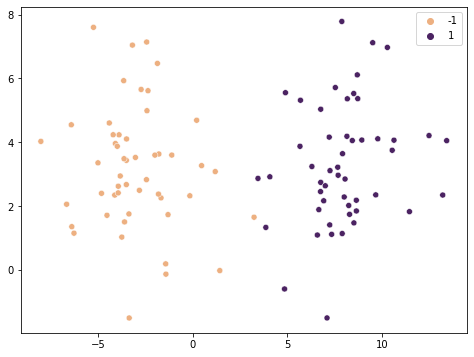

In [87]:
plt.figure(figsize = (8,6))
sbn.scatterplot(x = data_points[:,0], y = data_points[:,1], hue=labels,palette='flare')
plt.show()

Here the aim is to find a line(classifier) which will define a decision boundary between these two classes.

The equation of line we know that:

ax + by + c = 0

hence:

by = -ax - c

y = (-a/b)x + (-c/b)

here slope = (-a/b)

intercept = (-c/b)

here vector [a,b] (also known as vector w)is the normal direction to the line and c (also known as w0) is the intercept which decides the location of line w.r.t origin

w = [a,b]

w0 = c

lets initialize a,b,&c randomly

In [88]:
w = np.random.randn(2)
c = np.random.random()

In [89]:
w,c

(array([0.3471283 , 0.54778466]), 0.0833328415802147)

In [90]:
slope = -w[0]/w[1] #(-a/b)
intercept = -c/w[1]  #(-c/b)

In [91]:
slope,intercept

(-0.6336948068266446, -0.15212700716733019)

In [94]:
p = np.arange(-15,15,0.2)
q = slope * p + intercept

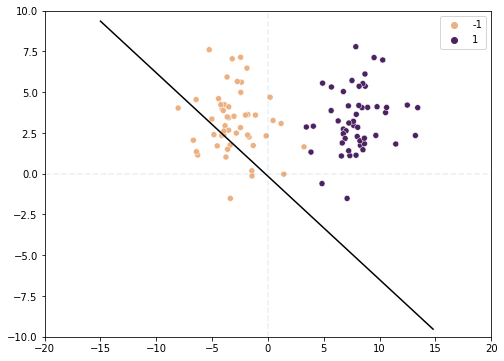

In [95]:
plt.figure(figsize = (8,6))
sbn.lineplot(x = p, y = q, color = 'black')
plt.axvline(x=0, alpha = 0.1, ls= '--')
plt.axhline(y = 0, alpha = 0.1, ls = '--')
sbn.scatterplot(x = data_points[:,0], y = data_points[:,1], hue=labels,palette='flare')
plt.xlim([-20,20])
plt.ylim([-10,10])
plt.show()

This is how our classifier looks like at beginning. (Rememeber this line is at random, so you will see a different line at beginning, everytime you repeat the process)

Now lets make a function which does all the above step

In [96]:
def make_plot(data_points,labels,w,c):
#     making line:
    slope = -w[0]/w[1] 
    intercept = -c/w[1]
    p = np.arange(-15,15,0.2)
    q = slope * p + intercept
    
    plt.figure(figsize = (8,6))
    sbn.lineplot(x = p, y = q, color = 'black')
    plt.axvline(x=0, alpha = 0.1, ls= '--')
    plt.axhline(y = 0, alpha = 0.1, ls = '--')
    sbn.scatterplot(x = data_points[:,0], y = data_points[:,1], hue=labels,palette='flare')
    plt.xlim([-20,20])
    plt.ylim([-10,10])
    plt.show()
    

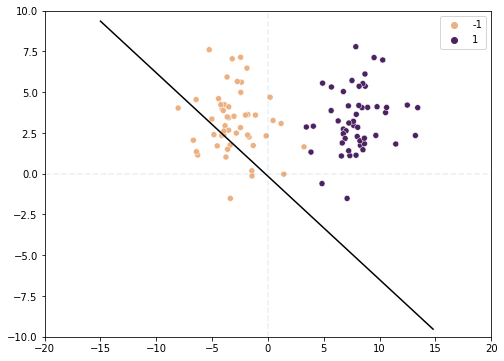

In [97]:
make_plot(data_points,labels,w,c)

So here we are halfway to the process :) i hope you are learning well!!

# Defining Algorithm

We assume that class 1 should be in +ve halfspace and class -1 should be in -ve halfspace from our classifier line

we will check each point one by one and see how our classifier predicts it to be in a particular halfspace.

if a point of +ve halfspace is misclassified then we will update the vector w of line by : w = w + x

if a point of -ve halfspace is misclassified then we will update the vector w of line by w = w - x

inshort:

update rule: w = w + x*(point's original class)

the constant c will be updated by c = c + 1*(point's original class)

In [98]:
def my_algo(data_points,labels,w,c):
    w = w
    c = c
    print('Inintal condition:')
    make_plot(data_points,labels,w,c)
    print()
    for iteration in range(1000): 
        # Number of times we repeat the experiment
        
        misclassified_points = 0    # Number of Misclassified_points 
        
        point_index = []
        
        for n in range(len(data_points)):
            
            if np.sign(np.dot(w,data_points[n]) + c) != labels[n]:
                misclassified_points += 1
                point_index.append(n)
        accuracy = (len(data_points) - misclassified_points)/len(data_points)
        
        if (iteration+1)%100 == 0:
            print('*'*50)
            print('iteration:', iteration + 1)
            make_plot(data_points,labels,w,c)
            print('Misclassified_points:', misclassified_points)
            print('Accuracy:', accuracy)
        
        if accuracy > 0.96:
            print('*'*50)
            print('iteration:', iteration + 1)
            print('Converged optimally')
            make_plot(data_points,labels,w,c)
            print('Accuracy:', accuracy)
            print('final w:',w)
            print('final c:',c)
            break
        
#         Now let's update the weights:
        
        if iteration == 999:
            print('*'*100)
            print('This is the best shot:')
            print('w:',w)
            print('c',c)
            
        positive = 0
        pos = np.array([0,0],dtype='float')

        negative = 0
        neg = np.array([0,0],dtype='float')
    
        for index in point_index:
            if labels[index] == 1:
                positive += 1
                pos += data_points[index]
            else:
                negative += 1
                neg += data_points[index]
        if positive != 0:
            pos = pos/positive
            w = w + pos
            c = c + 1
        else:
            neg = neg/negative
            w = w - neg
            c = c - 1
        
        

Inintal condition:


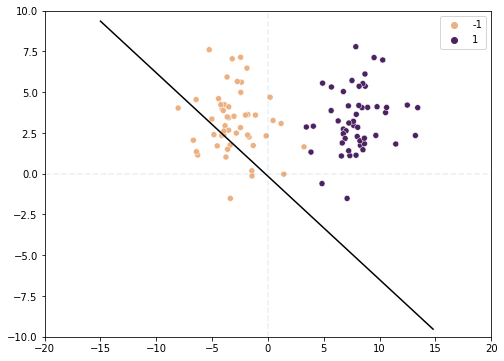


**************************************************
iteration: 5
Converged optimally


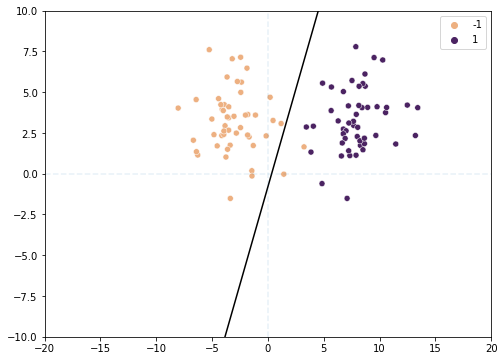

Accuracy: 0.98
final w: [ 5.7238415  -2.39305291]
final c: -1.9166671584197852


In [99]:
my_algo(data_points,labels,w,c)


we got line:

5.72x - 2.39y - 1.916 = 0 as the classifier line

# end()